You are given a pre-order traversal and an inorder traversal of a binary tree. Draw the binary tree from the two traversal results.
    
- pre-order: A, B, C, D, E, F, G
    - Root → Left subtree → RIght Subtree
- inorder: C, B, E, D, A, F, G
    - Left SubTree → Root → Right SubTree

        A
       / \
      B   F
     / \   \
    C   D   F
	   / 
      E


##### (levelOrderTraversal) 
Write an iterative function levelOrderIterative() that prints a level-by-level traversal of the binary search tree using a queue, starting at the root node level.

The function uses only enqueue() or dequeue() operations to add or remove nodes from the queue. Ensure the queue is empty at the beginning of the traversal.

The function prototype is given as follows:

def levelOrderIterative(root):

Following is the detailed algorithm:
1) Create an empty queue q
2) If tree is not empty, then Enqueue root to the Queue
3) Repeat until Queue is empty
    <br>3.1) Dequeue node’s data from the queue and print it
    <br>3.2) Enqueue node’s left child to the q
    <br>3.3) Enqueue node’s right child to the q 
    <div style="max-width:500px;margin-right: auto; margin-right: 0;">
        
    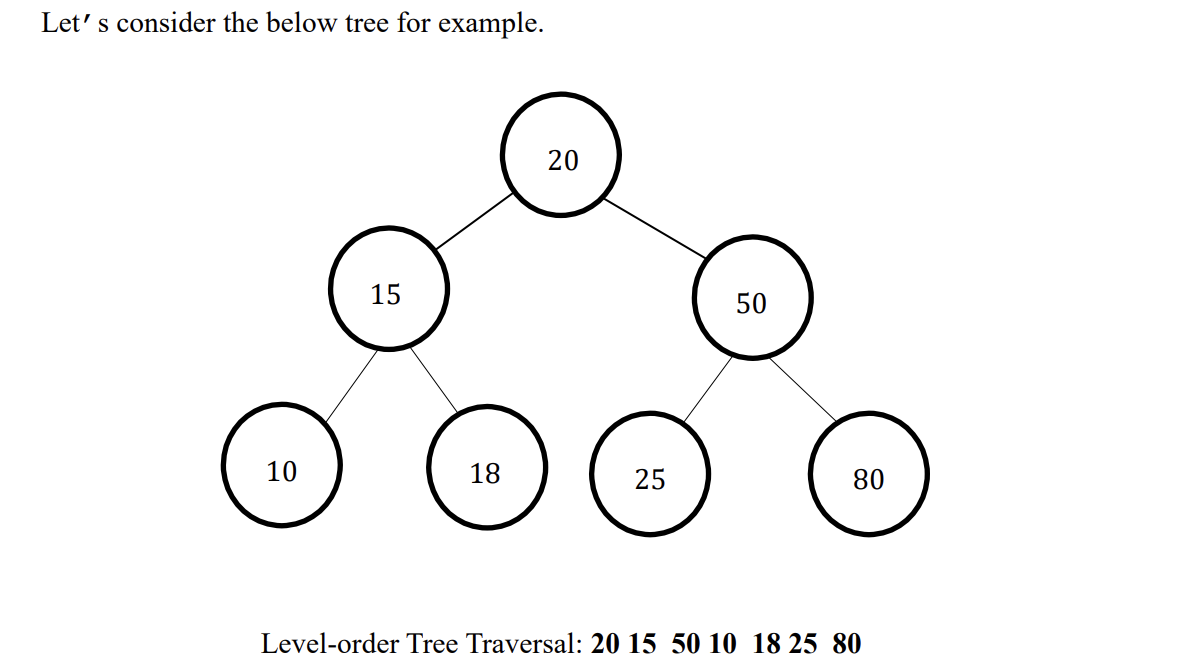    

    </div>

In [4]:
class Bst_node:
    def __init__(self, item):
        self.item = item
        self.left = None
        self.right = None

class Queue_node:
    def __init__(self, data):
        self.data = data
        self.next_ptr = None

class Queue:
    def __init__(self):
        self.head = None
        self.tail = None

def insert_bst_node(node_ref, value):
    if node_ref[0] is None:
        node_ref[0] = Bst_node(value)
    else:
        if value < node_ref[0].item:
            if node_ref[0].left is None:
                node_ref[0].left = Bst_node(value)
            else:
                insert_bst_node([node_ref[0].left], value)
        elif value > node_ref[0].item:
            if node_ref[0].right is None:
                node_ref[0].right = Bst_node(value)
            else:
                insert_bst_node([node_ref[0].right], value)

def enqueue(queue, node):
    new_node = Queue_node(node)

    if is_empty(queue.head):
        queue.head = new_node
    else:
        queue.tail.next_ptr = new_node

    queue.tail = new_node

def dequeue(queue):
    if queue.head is not None:
        node = queue.head.data
        queue.head = queue.head.next_ptr
        if queue.head is None:  # If the queue becomes empty
            queue.tail = None
        return node
    return None

def is_empty(head):
    return head is None

def remove_all(node_ref):
    if node_ref[0] is not None:
        remove_all([node_ref[0].left])
        remove_all([node_ref[0].right])
        del node_ref[0]

def level_order_traversal(root):
    q = Queue()
    temp = root
    if temp is not None:
        enqueue(q,temp)
        while not is_empty(q.head):
            temp = dequeue(q)
            print(temp.item, end = ' ')
            if temp.left is not None:
                enqueue(q, temp.left)
            if temp.right is not None:
                enqueue(q, temp.right)


# Main function to run the program.
if __name__ == "__main__":
    c = 1
    root = [None]  # Use a list to allow modification of the root reference

    print("1: Insert an integer into the binary search tree;")
    print("2: Print the level-order traversal of the binary search tree;")
    print("0: Quit;")

    while c != 0:
        c = int(input("Please input your choice(1/2/0): "))

        if c == 1:
            i = int(input("Input an integer that you want to insert into the Binary Search Tree: "))
            insert_bst_node(root, i)

        elif c == 2:
            print("The resulting level-order traversal of the binary search tree is: ", end="")
            level_order_traversal(root[0])  # Pass the actual root node
            print()

        elif c == 0:
            remove_all(root)

        else:
            print("Choice unknown;")

1: Insert an integer into the binary search tree;
2: Print the level-order traversal of the binary search tree;
0: Quit;
The resulting level-order traversal of the binary search tree is: 1 2 3 4 5 6 7 8 9 


##### (preOrderIterative) 

Write an iterative function preOrderIterative() that prints the <br>
pre-order traversal of a binary search tree using a stack. The function uses only push() or pop() operations to add or remove nodes from the stack. Ensure the stack is empty at the beginning of the traversal.<br>
The function prototype is given as follows:<br>
def preOrderIterative(root):

Following is the detailed algorithm:
1) Create an empty stack nodeStack and push root node to stack.
2) Do following while nodeStack is not empty.
    <br>2.1) Pop an item from stack and print it.
    <br>2.2) Push right child of popped item to stack
    <br>3.3) Push left child of popped item to stack
- Right child is pushed before left child to make sure that left subtree is processed first. 

    <div style="max-width:500px;margin-right: auto; margin-right: 0;">
        
    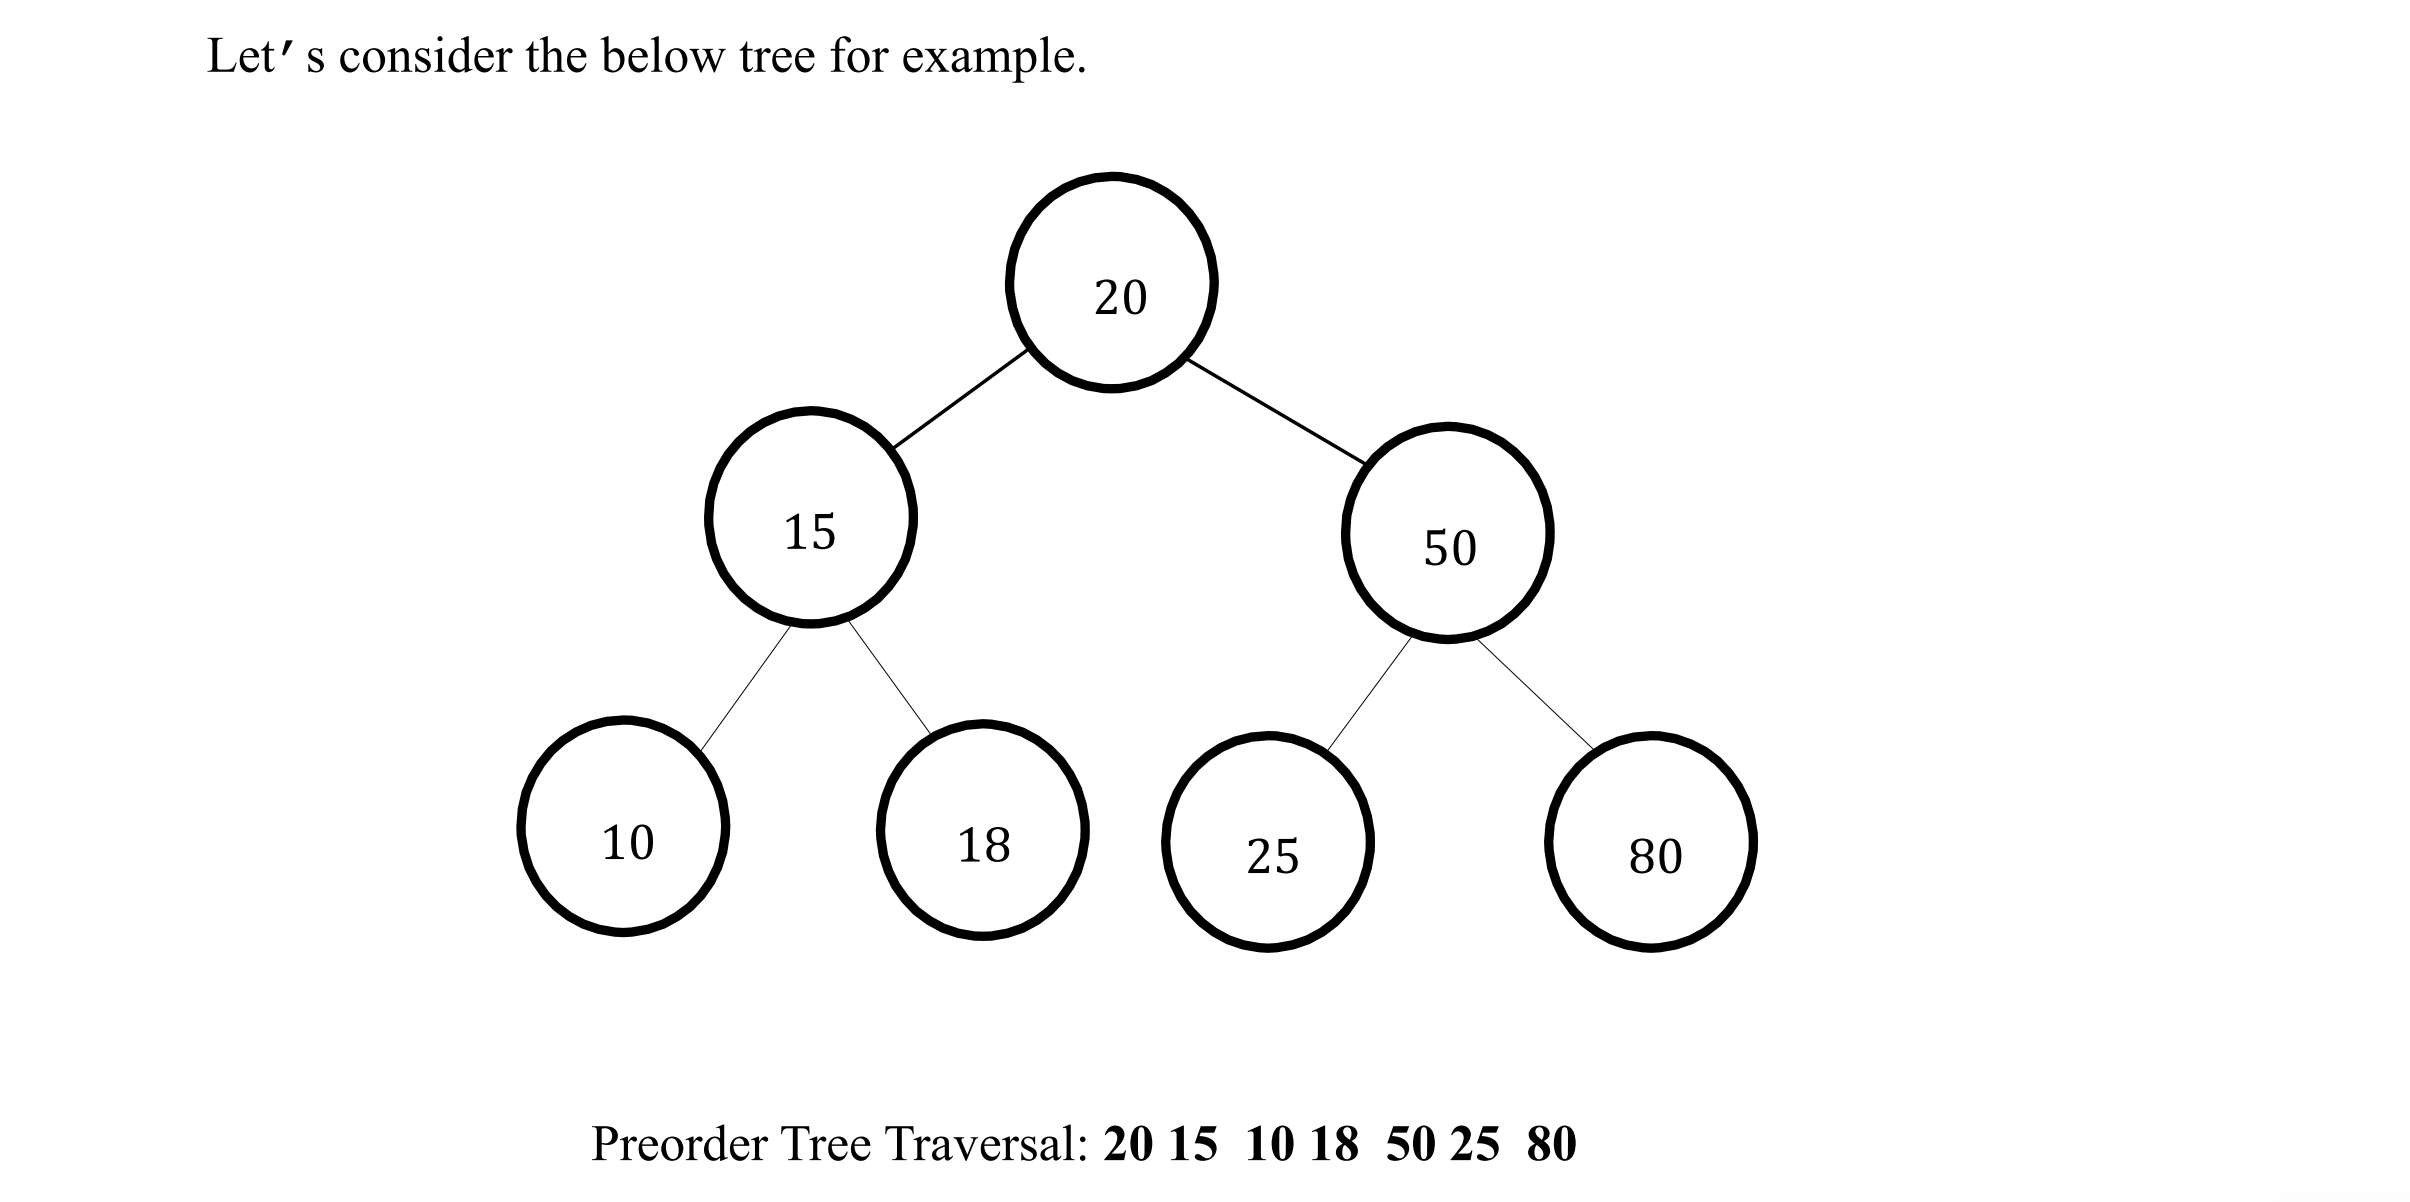   

    </div>

In [3]:
class Bst_node:
    def __init__(self, item):
        self.item = item
        self.left = None
        self.right = None

class Stack_node:
    def __init__(self, data):
        self.data = data
        self.next = None

class Stack:
    def __init__(self):
        self.top = None

def insert_bst_node(node_ref, value):
    if node_ref[0] is None:
        node_ref[0] = Bst_node(value)
    else:
        if value < node_ref[0].item:
            if node_ref[0].left is None:
                node_ref[0].left = Bst_node(value)
            else:
                insert_bst_node([node_ref[0].left], value)
        elif value > node_ref[0].item:
            if node_ref[0].right is None:
                node_ref[0].right = Bst_node(value)
            else:
                insert_bst_node([node_ref[0].right], value)

def push(stack, node):
    temp = Stack_node(node)

    if stack.top is None:
        stack.top = temp
        temp.next = None
    else:
        temp.next = stack.top
        stack.top = temp

def pop(s):
    if s.top is None:
        return None

    temp = s.top.next
    ptr = s.top.data
    s.top = temp
    return ptr

def peek(s):
    if s.top is None:
        return None
    return s.top.data

def isEmpty(s):
    return s.top is None

def removeAll(node_ref):
    if node_ref[0] is not None:
        removeAll([node_ref[0].left])
        removeAll([node_ref[0].right])
        node_ref[0] = None

def pre_order_iterative(root):
    stack = Stack()
    temp = root

    if temp is None:
        return

    push(stack,temp)
    
    while not isEmpty(stack):
            temp = pop(stack)
            print(temp.item, end = ' ')
            if temp.right is not None:
                push(stack, temp.right)
            if temp.left is not None:
                push(stack, temp.left)            

def main():
    root = [None]  # Using list to simulate pointer reference

    print("1: Insert an integer into the binary search tree;")
    print("2: Print the pre-order traversal of the binary search tree;")
    print("0: Quit;")

    while True:
        try:
            c = int(input("Please input your choice(1/2/0): "))

            if c == 1:
                i = int(input("Input an integer that you want to insert into the Binary Search Tree: "))
                insert_bst_node(root, i)

            elif c == 2:
                print("The resulting pre-order traversal of the binary search tree is: ", end="")
                pre_order_iterative(root[0])
                print()

            elif c == 0:
                removeAll(root)
                break

            else:
                print("Choice unknown;")

        except ValueError:
            print("Invalid input")
            continue


if __name__ == "__main__":
    main()

1: Insert an integer into the binary search tree;
2: Print the pre-order traversal of the binary search tree;
0: Quit;
The resulting pre-order traversal of the binary search tree is: 1 2 3 4 5 6 7 8 


##### {maxDepth) 

Write a Python function to find the maximum depth of a binary tree. 

<div style="max-width:500px;margin-right: auto; margin-right: 0;">
        
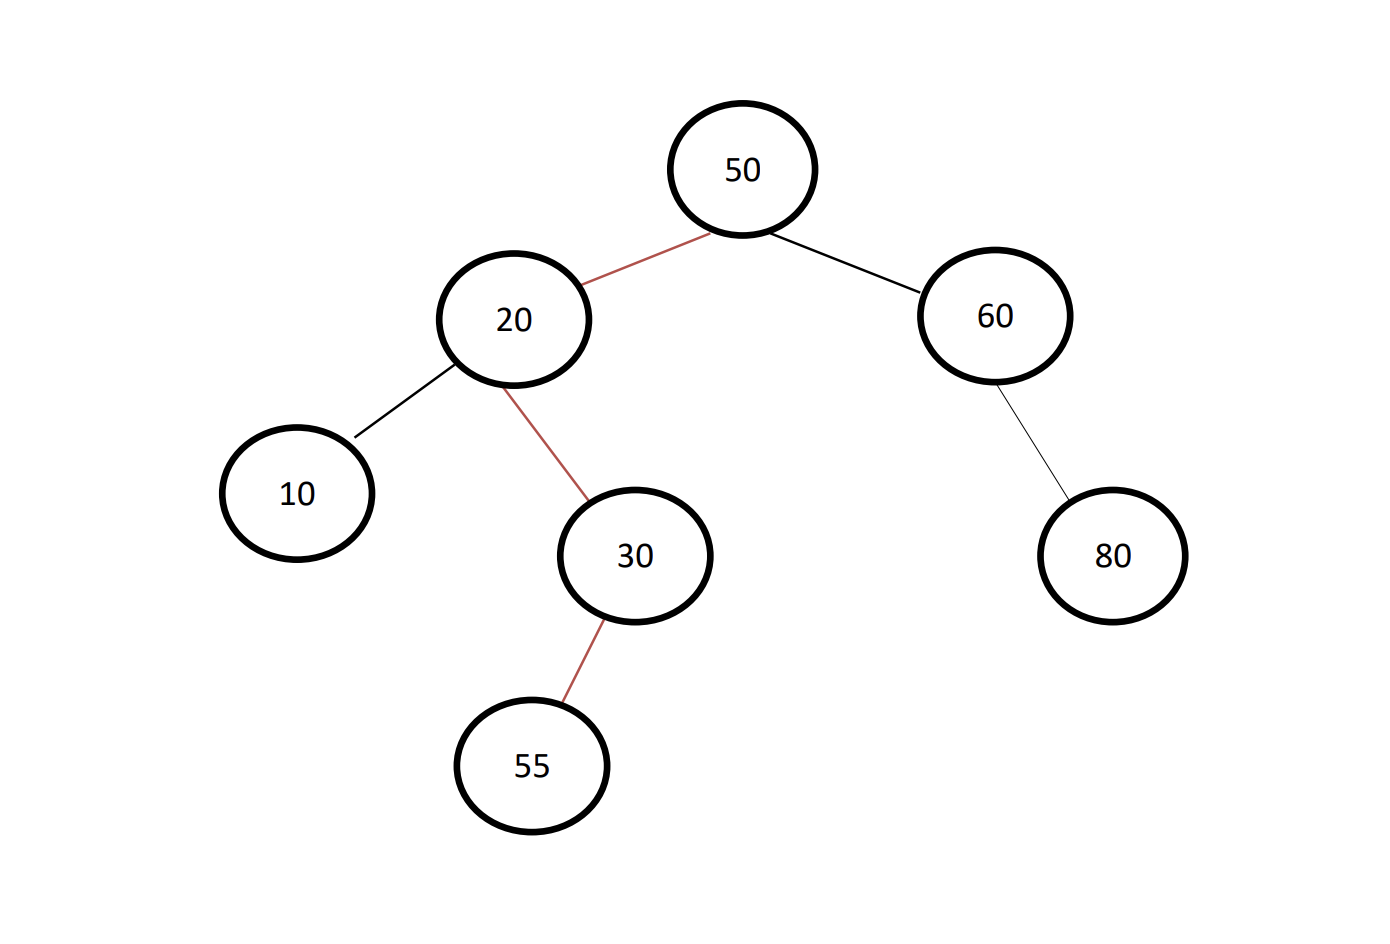   

</div>

The function prototype is given as follows: <br>
def maxDepth(node): 

- Find the maximum depth of the binary tree: 3 
    * The height of a tree is the number of edges in the longest path from root to a leaf.

In [5]:
class Bt_node:
    def __init__(self, item):
        self.item = item
        self.left = None
        self.right = None

class Stack_node:
    def __init__(self, btnode):
        self.btnode = btnode
        self.next = None

class Stack:
    def __init__(self):
        self.top = None

def create_bt_node(item):
    return Bt_node(item)

def push(stack, node):
    temp = Stack_node(node)
    if stack.top is None:
        stack.top = temp
        temp.next = None
    else:
        temp.next = stack.top
        stack.top = temp

def pop(stack):
    if stack.top is None:
        return None

    temp = stack.top.next
    ptr = stack.top.btnode
    stack.top = temp
    return ptr

def print_tree(node):
    if node is None:
        return
    print_tree(node.left)
    print(node.item, end=" ")
    print_tree(node.right)

def create_tree():
    stack = Stack()
    root = None

    print("Input an integer that you want to add to the binary tree. Any Alpha value will be treated as NULL.")
    try:
        item = input("Enter an integer value for the root: ")
        root = create_bt_node(int(item))
        push(stack, root)
    except ValueError:
        return None

    while True:
        temp = pop(stack)
        if temp is None:
            break

        try:
            item = input(f"Enter an integer value for the Left child of {temp.item}: ")
            temp.left = create_bt_node(int(item))
        except ValueError:
            temp.left = None

        try:
            item = input(f"Enter an integer value for the Right child of {temp.item}: ")
            temp.right = create_bt_node(int(item))
        except ValueError:
            temp.right = None

        if temp.right is not None:
            push(stack, temp.right)
        if temp.left is not None:
            push(stack, temp.left)

    return root

def remove_all(node):
    if node is not None:
        remove_all(node.left)
        remove_all(node.right)
        node.left = None
        node.right = None

def max_depth(node):
    if node is None:
        return -1
    else:
        left_depth = max_depth(node.left)
        right_depth = max_depth(node.right)

        if left_depth > right_depth:
            return left_depth + 1
        else:
            return right_depth + 1

def main():
    root = None

    print("1: Create a binary tree.")
    print("2: Find the maximum depth of the binary tree.")
    print("0: Quit;")

    while True:
        try:
            c = int(input("\nPlease input your choice(1/2/0): "))

            if c == 1:
                root = None  # Clear existing tree
                root = create_tree()
                print("The resulting binary tree is: ", end="")
                print_tree(root)
                print()

            elif c == 2:
                depth = max_depth(root)
                print(f"The maximum depth of the binary tree is: {depth}")
                root = None

            elif c == 0:
                if root:
                    remove_all(root)
                break

            else:
                print("Choice unknown;")

        except ValueError:
            continue

if __name__ == "__main__":
    main()

1: Create a binary tree.
2: Find the maximum depth of the binary tree.
0: Quit;
Input an integer that you want to add to the binary tree. Any Alpha value will be treated as NULL.
The resulting binary tree is: 10 20 55 30 50 60 80 
The maximum depth of the binary tree is: 3


In [ ]:
class Node:
    def __init__(self, y):
        self.data = y
        self.left = None
        self.right = None

def printPreOrder(node):
    if node is None:
        return
    
    print(node.data, end= ' ')
    printPreOrder(node.left)
    printPreOrder(node.right)

def printInOrder(node):
    if node is None:
        return
    printInOrder(node.left)
    print(node.data, end= ' ')
    printInOrder(node.right)

def printPostOrder(node):
    if node is None:
        return
    printPostOrder(node.left)
    printPostOrder(node.right)
    print(node.data, end= ' ')

def printSum(node):
    if node is None:
        return 0
    
    if node.data % 2 == 0:
        sum_even = node.data
    else:
        sum_even = 0

    return sum_even + printSum(node.left) + printSum(node.right)

# Driver code
if __name__ == '__main__':
    root = Node(1)
    root.left = Node(2)
    root.right = Node(3)
    root.left.left = Node(4)
    root.left.right = Node(5)
    root.right.right = Node(6)

    # Function call
    print("Preorder traversal of binary tree is:")
    printPreOrder(root)

    print("\nInOrder traversal of binary tree is:")
    printInOrder(root)

    print("\nPostOrder traversal of binary tree is:")
    printPostOrder(root)

    print("\nSum of even nodes: ")
    print(printSum(root))

Preorder traversal of binary tree is:
1 2 4 5 3 6 
InOrder traversal of binary tree is:
4 2 5 1 3 6 
PostOrder traversal of binary tree is:
4 5 2 6 3 1 
Sum of even nodes: 
12
